# Lab 7

This lab is about Event Selection Optmization. 
I am using the higher pT sample.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle as pk

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Load in LHC Data: High pT (transverse momentum) data set

First Load in Higgs data

In [2]:
#Load Higgs Data & Define Variables
pickle_higgs = open('higgs_100000_pt_1000_1200.pkl', 'rb')
higgs = pk.load(pickle_higgs)

#Define 
hMass = higgs['mass']
hPt = higgs['pt']
hEta = higgs['eta']
hPhi = higgs['phi']
hEe2 = higgs['ee2']
hEe3 = higgs['ee3']
hD2 = higgs['d2']
hAngularity = higgs['angularity']
hT1 = higgs['t1']
hT2 = higgs['t2']
hT3 = higgs['t3']
hT21 = higgs['t21']
hT32 = higgs['t32']
hKtDeltaR = higgs['KtDeltaR']

Load in QCD data

In [3]:
#Load QCD Data & Define Variables
pickle_qcd = open('qcd_100000_pt_1000_1200.pkl', 'rb')
qcd = pk.load(pickle_qcd)

#Define data features
qMass = qcd['mass']
qPt = qcd['pt']
qEta = qcd['eta']
qPhi = qcd['phi']
qEe2 = qcd['ee2']
qEe3 = qcd['ee3']
qD2 = qcd['d2']
qAngularity = qcd['angularity']
qT1 = qcd['t1']
qT2 = qcd['t2']
qT3 = qcd['t3']
qT21 = qcd['t21']
qT32 = qcd['t32']
qKtDeltaR = qcd['KtDeltaR']

### Problem 1
Make stacked histogram plot for feature mass variable.
- Use poisson statistics to calculate significance
- Compaire N_higgs/sqrt(N_qcd). If they are the same explain findings

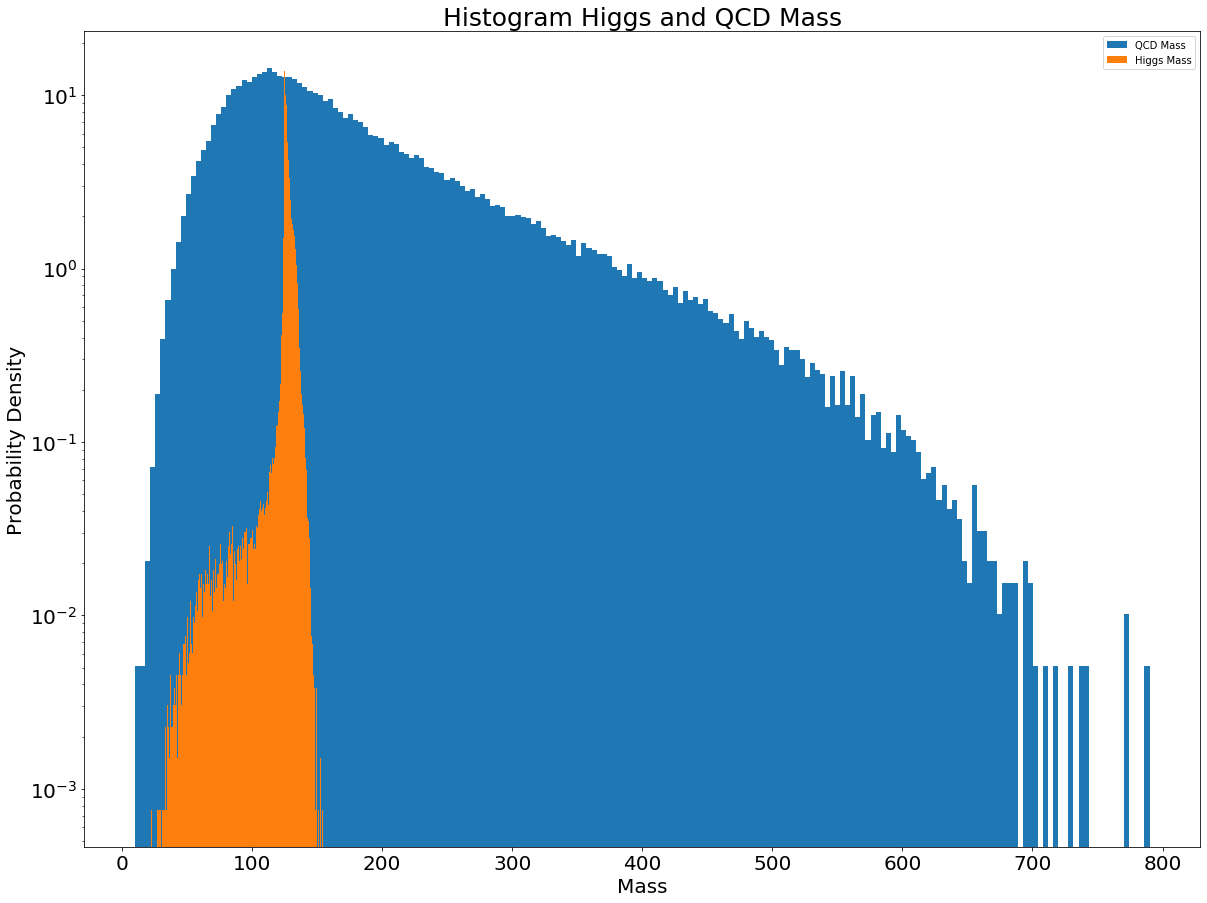

In [90]:
# n_bins = 100
n_higgs = 50
n_qcd = 2000


#qcd data
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

#higgds 
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs


plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = 'Higgs Mass')
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Histogram Higgs and QCD Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

In [5]:
print('QCD area = ', (hist_qcd * widths_qcd).sum())

print('Higgs area = ', (hist_higgs * widths_higgs).sum())

QCD area =  2000.0
Higgs area =  50.0


This is a graph of the Mass Probability distributions for Higgs Mass data in orange, and background QCD data in blue. 

The expected yeild of particles is N_qcd = 2000 for QCD, and N_higgs = 50 for Higgs. By checking that the area of the graph should add up to the number of expected yield particles, we can see that the graph is normalized. 


**Significance Calculation:**
Calculate 5 sigma significance in both Higgs and QCD Mass data using the mean from both datasets and poisson statistics.

In [8]:
#--- significance calculation --- 

#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#Higgs: Calculate 5 sigma upper bound
hMean = np.mean(hMass)
hStd = np.std(hMass)
print('standard deviation of higgs mass = ', hStd)
print('mean higgs mass value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound  = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qMean = np.mean(qMass)
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('Upper Bound = ', qUpper)
qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound = ', qLower)

print()
#Calculate Signal to Noise Ratios
stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

standard deviation of higgs mass =  8.407948104697619
mean higgs mass value =  126.663832224776

Higgs Signal 5 sigma detection:
Upper bound  =  187.0
Lower bound =  75.0

QCD Signal 5 sigma detection:
Upper Bound =  248.0
Lower bound =  115.0

signal to noise ratio =  0.7540322580645161


The upper limit of the mass signal strength corresponding to a 5 sigma detection from the background QCD signal is 248. For higgs data it is 187. 

The detection on the mass x axis needs to be less than (or equal to) the upper bound value of higgs to have a legitamite higgs detection. 

**Compare Number of N_higgs/sqrt(N_qcd)**

The ratio between the higgs and the QCD expected yeild values is: N_higgs / sqrt(N_qcd) = 1.118. 

The upper bound higgs signal to qcd noise ratio number 0.75.

These number are not the same, but sort of close.

We want to make cuts of the data to optimize the significance. The signal to noise ratio number should increase, because the significance value of the higgs should increase while the significance value of QCD should decrease.

### Problem 2
Identify mass cuts to optimize. Use poisson statistics to calculate significance
- Compaire N_higgs/sqrt(N_qcd). If they are the same explain findings

After trying different cuts of the data, the code below for Cut C is the cut that optimized the data the best. This was the cut that had the least QCD data points and the most HIggs data points. 

#### Cut B:
Cutting everything except one standard deviation on either side of the mean of the Higgs data.

In [9]:
hMassB = []
qMassB = []
hMean = np.mean(hMass)
hStd = np.std(hMass)
upperBoundB = hMean + hStd
lowerBoundB = hMean - hStd

for i in range(len(hMass)):
    if hMass[i] < upperBoundB and hMass[i] > lowerBoundB:
        hMassB.append(hMass[i])
    if qMass[i] < upperBoundB and qMass[i] > lowerBoundB:
        qMassB.append(qMass[i])
len(hMassB), len(qMassB)

(92137, 10788)

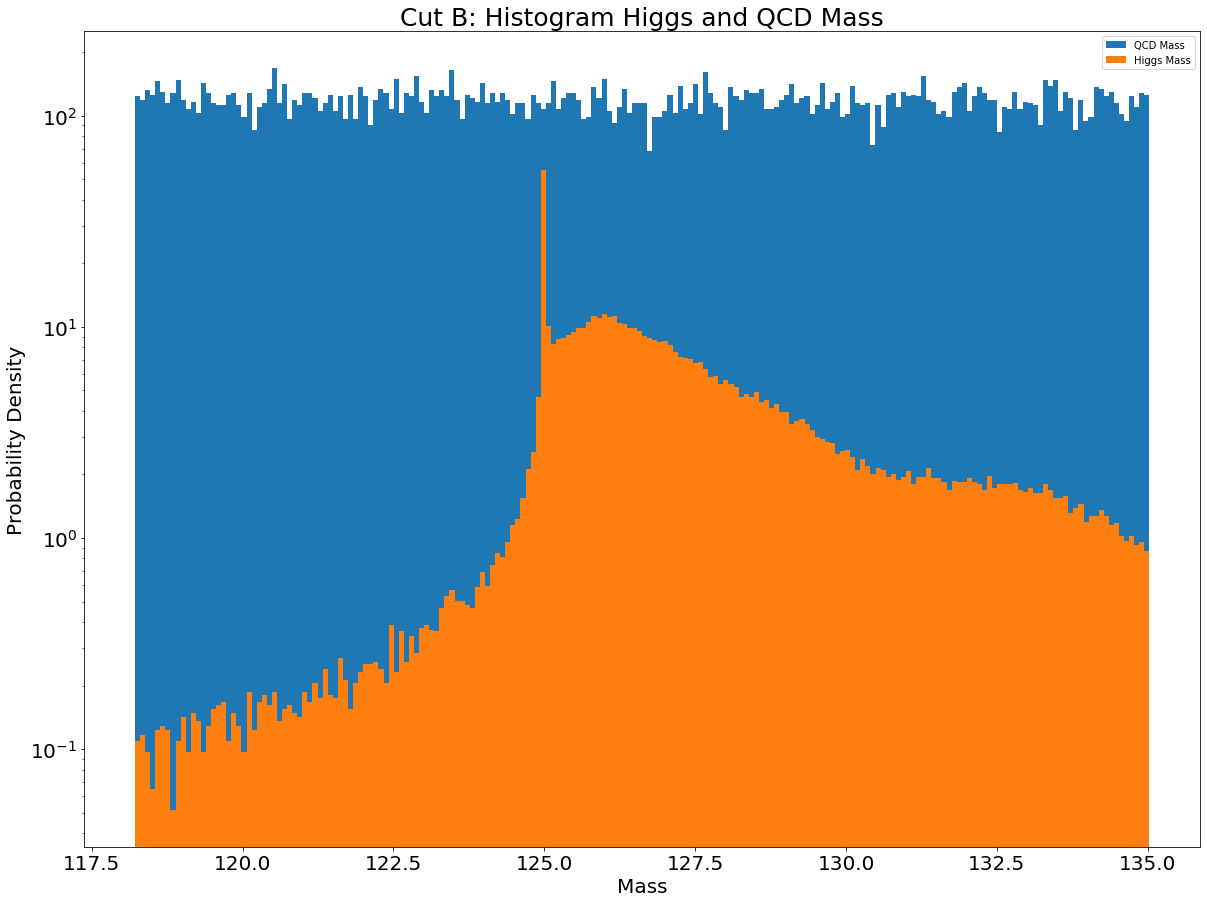

Expected yeild qcd =  2000.0000000000011
Expected yeild higgs =  50.00000000000001


In [217]:
#---- Plotting Cut B----

#qcd data 
hist_qcd, bins_q = np.histogram(qMassB, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassB, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Cut B: Histogram Higgs and QCD Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

Here we can see the expected particle yeilds are the correct values, so the graph is normalized. 

**Calculate Significance for Cut B**

In [11]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#Higgs: Calculate 5 sigma upper bound
hMeanB = np.mean(hMassB)
hStdB = np.std(hMassB)
print('standard deviation of higgs mass = ', hStdB)
print('mean higgs mass value = ', hMeanB)

print()

hUpperB = stats.poisson.isf(probability, mu=hMeanB, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpperB)

hLowerB = stats.poisson.isf(1 - probability, mu=hMeanB, loc=0)
print('Lower bound signal strength = ', hLowerB)

print()

#QCD: Calculate 5 sigma upper bound
qMeanB = np.mean(qMassB)
qUpperB = stats.poisson.isf(probability, mu=qMeanB)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpperB)

qLowerB = stats.poisson.isf(1 - probability, mu=qMeanB, loc=0)
print('Lower bound signal strength = ', qLowerB)

stn = hUpperB / qUpperB
print('signal to noise ratio = ', stn)


standard deviation of higgs mass =  2.679983179666338
mean higgs mass value =  127.50665950146521

Higgs Signal 5 sigma detection:
Upper bound signal strength =  188.0
Lower bound signal strength =  75.0

QCD Signal 5 sigma detection:
signal strength =  187.0
Lower bound signal strength =  75.0
signal to noise ratio =  1.0053475935828877


Here we can see that the signal to noise ratio ha
This ratio has increased from 0.99 to 1.0. This means we have optmized the data but only by a very small amount.

#### Cut C:
In this cut I eyeballed the data and systematically changed the upper and lower mass window bounds to find one that reduced the background noise while keeping as much higgs data as possible, and thus increasing the significance found.

Overall, mass Cut C was the best cut found. 

In [113]:
#Trying New Eyeball Cut
hMassCut = []
qMassCut = []
hMean = np.mean(hMass)
hStd = np.std(hMass)
upperBound = 145
lowerBound = 40

for i in range(len(hMass)):
    if hMass[i] < upperBound and hMass[i] > lowerBound:
        hMassCut.append(hMass[i])
    if qMass[i] < upperBound and qMass[i] > lowerBound:
        qMassCut.append(qMass[i])

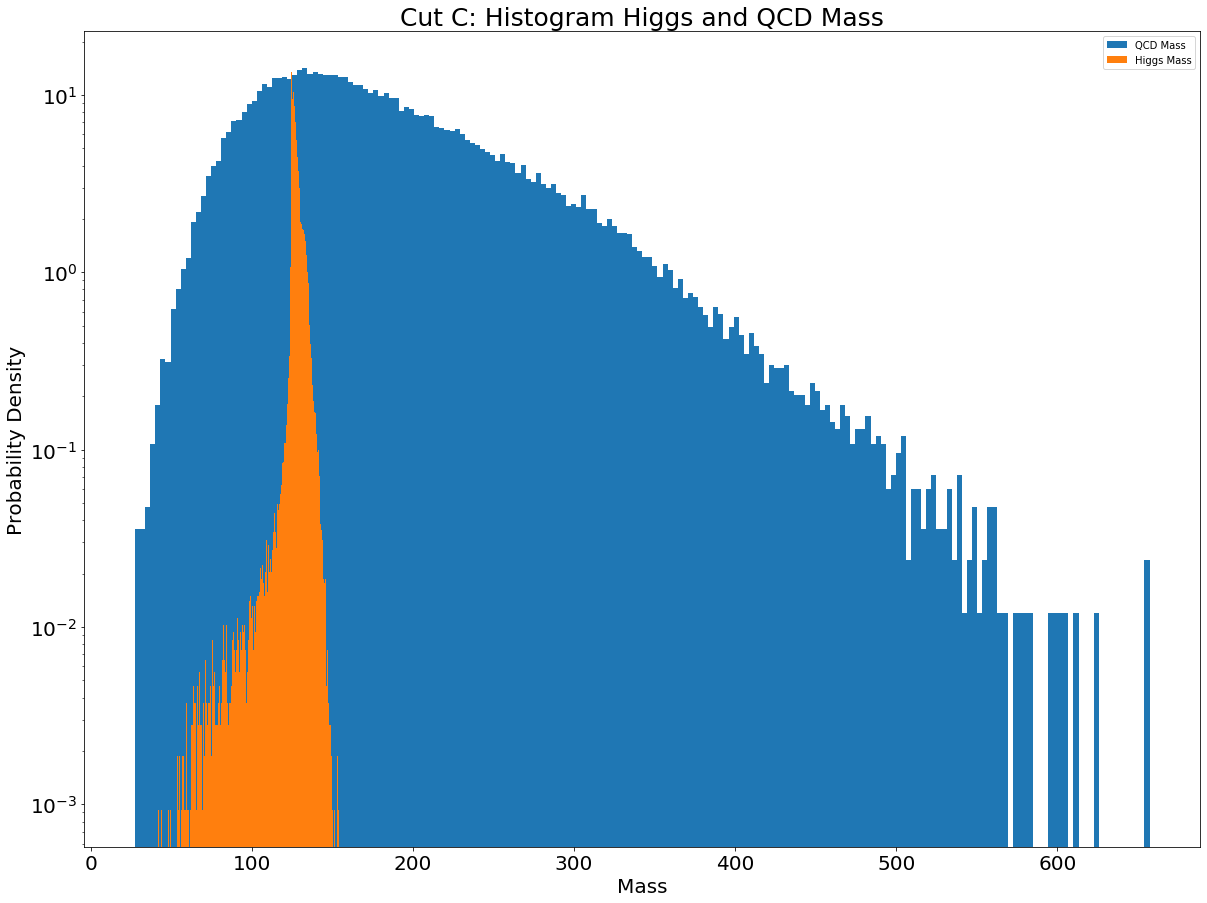

Expected yeild qcd =  1999.999999999999
Expected yeild higgs =  50.000000000000014


In [218]:
#---- Plotting Cut C----

#qcd data 
hist_qcd, bins_q = np.histogram(qMassCut, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassCut, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Cut C: Histogram Higgs and QCD Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

In [115]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#Higgs: Calculate 5 sigma upper bound
hMeanB = np.mean(hMassCut)
hStdB = np.std(hMassCut)
print('standard deviation of higgs mass = ', hStdB)
print('mean higgs mass value = ', hMeanB)

print()

hUpperB = stats.poisson.isf(probability, mu=hMeanB, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpperB)

hLowerB = stats.poisson.isf(1 - probability, mu=hMeanB, loc=0)
print('Lower bound signal strength = ', hLowerB)

print()

#QCD: Calculate 5 sigma upper bound
qMeanB = np.mean(qMassCut)
qUpperB = stats.poisson.isf(probability, mu=qMeanB)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpperB)

qLowerB = stats.poisson.isf(1 - probability, mu=qMeanB, loc=0)
print('Lower bound signal strength = ', qLowerB)

stn = hUpperB / qUpperB
print('signal to noise ratio = ', stn)

standard deviation of higgs mass =  8.203060120226635
mean higgs mass value =  126.68309057972657

Higgs Signal 5 sigma detection:
Upper bound signal strength =  187.0
Lower bound signal strength =  75.0

QCD Signal 5 sigma detection:
signal strength =  160.0
Lower bound signal strength =  58.0
signal to noise ratio =  1.16875


This mass cut was done by eyeballing the data and looking for the best ratio between higgs data and QCD data and systematically trying different values. It produced the highest signal to noise ratio significance of **1.16875**, greater than with no mass window by ~ 0.42.

### Problem 3
Optimization Cuts for other variables 

**Set A:**
After exploring all the other variables, we could not find any other variables that had as much discrimination power as mass. 

Below is the code for the trial of Transverse Momentum with no event selection.

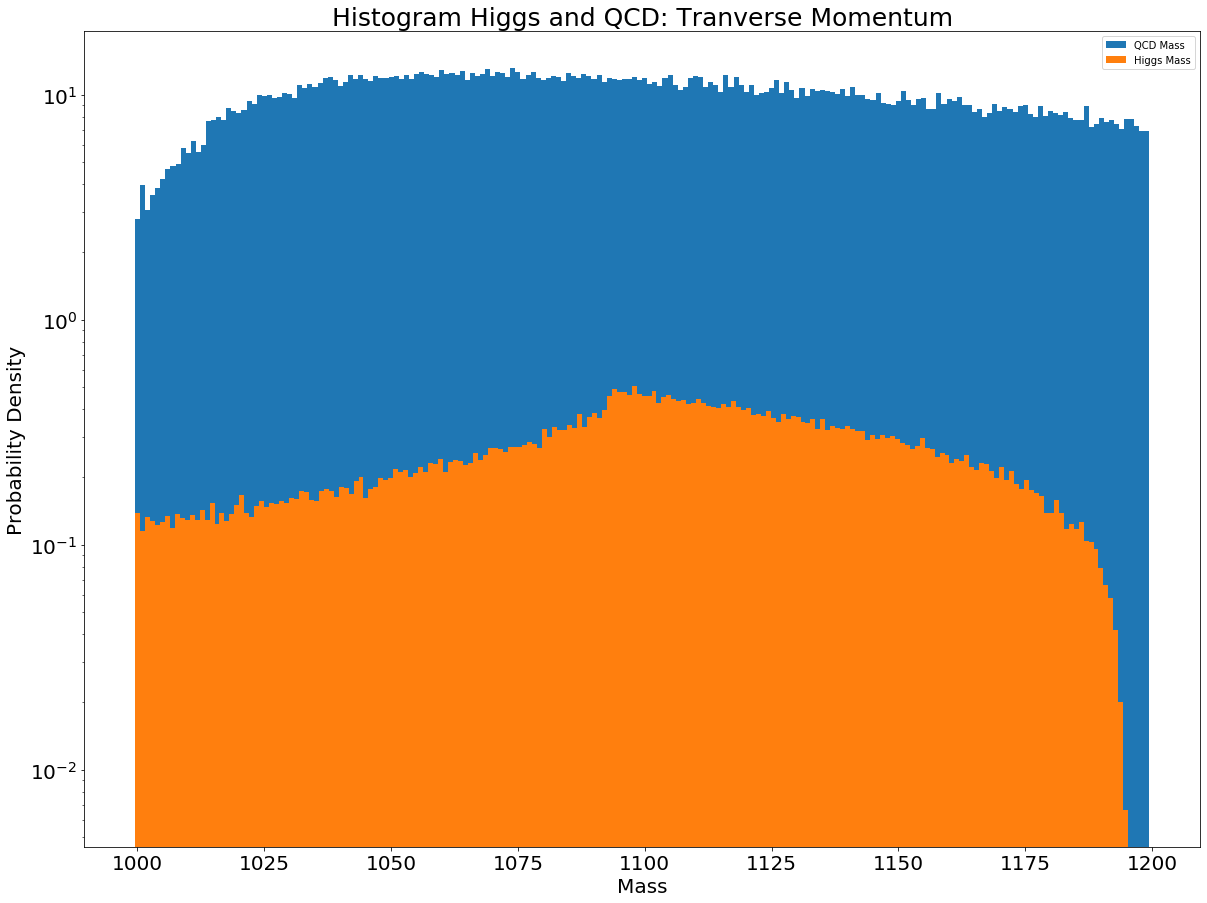

Expected yeild qcd =  2000.0000000000005
Expected yeild higgs =  49.999999999999986


In [12]:
#---- Plotting Transverse Momentum ----

#qcd data 
hist_qcd, bins_q = np.histogram(qPt, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hPt, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Histogram Higgs and QCD: Tranverse Momentum', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

In [13]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound
hMean = np.mean(hPt)
hStd = np.std(hPt)
print('standard deviation of higgs mass = ', hStd)
print('mean higgs mass value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qMean = np.mean(qPt)
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)


standard deviation of higgs mass =  45.83775867291146
mean higgs mass value =  1102.5019962312726

Higgs Signal 5 sigma detection:
Upper bound signal strength =  1272.0
Lower bound signal strength =  941.0

QCD Signal 5 sigma detection:
signal strength =  1269.0
Lower bound signal strength =  937.0

signal to noise ratio =  1.0023640661938533


Here we can see that the signal to noise ratio is smaller than the mass cut signal to noise ratio found in problem 1.

**Set B:**
Identify additional feature to further improve expected significance.

After trying all the different variables with discrimination power found in lab 5, we could not find a cut of a variable that had as much discrimination power as mass. 

Below are my trials for the variables Tau_3 and KtDeltaR. After creating cuts of these windows, I created a simultanious mass cut to see how it affected the significance. 

In [120]:
#Defining cuts of data for each varialbe
hMassC = []
qMassC = []

hPtC = []
qPtC = []

hEe2C = []
qEe2C = []

hT2C = []
qT2C = []

hT3C = []
qT3C = []

hT21C = []
qT21C = []

hKtDeltaRC = []
qKtDeltaRC = []



hMean = np.mean(hMass)
hStd = np.std(hMass)

upperBound = 145
lowerBound = 40

for i in range(len(hMass)):
    if hMass[i] < upperBound and hMass[i] > lowerBound:
        
        hMassC.append(hMass[i])
        hPtC.append(hPt[i])
        hEe2C.append(hEe2[i])
        hT2C.append(hT2[i])
        hT3C.append(hT3[i])
        hT21C.append(hT21[i])
        hKtDeltaRC.append(hT21[i])
        
    if qMass[i] < upperBound and qMass[i] > lowerBound:
        
        qMassC.append(qMass[i])
        qPtC.append(qPt[i])
        qEe2C.append(qEe2[i])
        qT2C.append(qT2[i])
        qT3C.append(qT3[i])
        qT21C.append(qT21[i])
        qKtDeltaRC.append(qT21[i])
        
len(hMassC), len(qMassC)
len(hPtC), len(qPtC)

(99886, 47947)

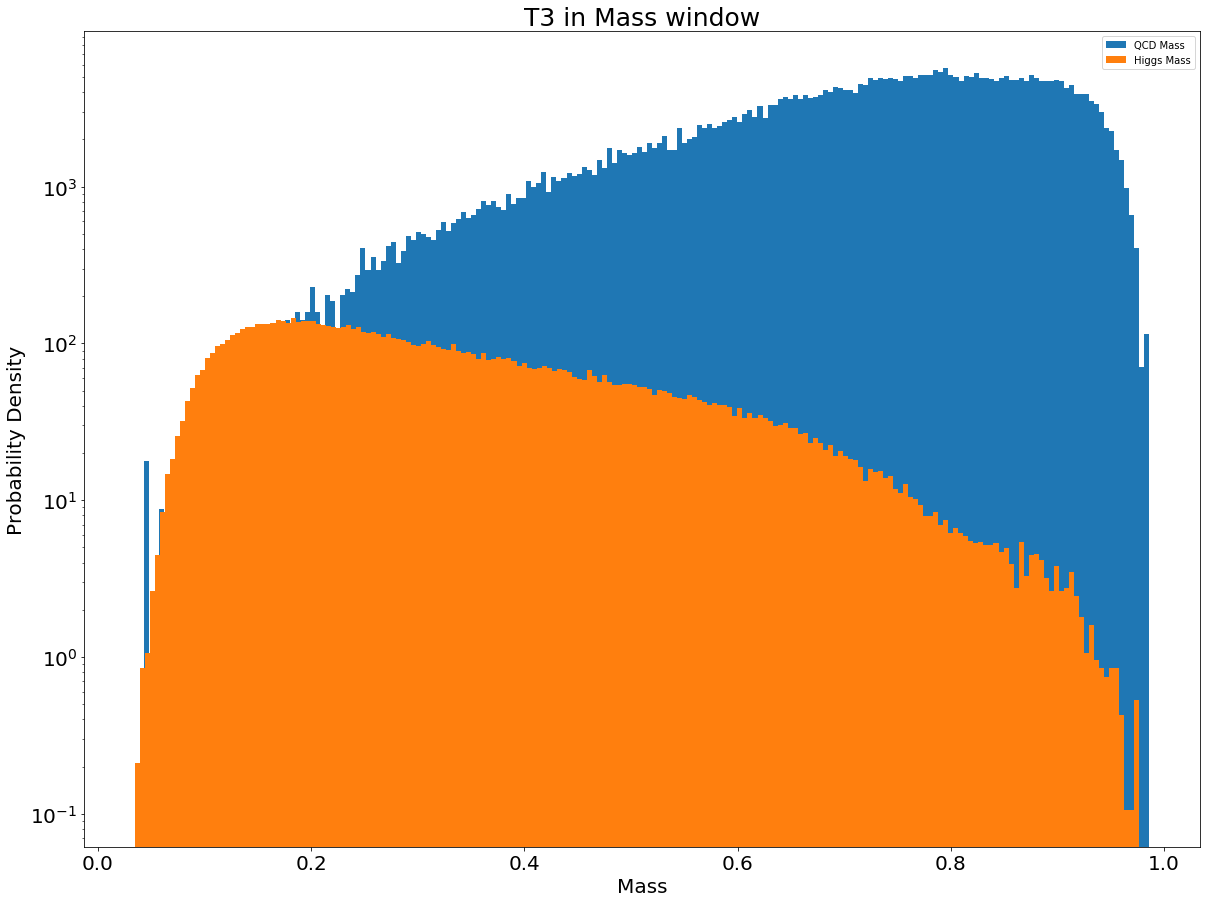

Expected yeild qcd =  1999.999999999999
Expected yeild higgs =  49.999999999999964


In [201]:
#---- Plotting Transverse Momentum ----

#qcd data 
hist_qcd, bins_q = np.histogram(qKtDeltaRC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hKtDeltaRC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('T3 in Mass window', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

In [202]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound

#(CHANGE for each different cut)
hMean = np.mean(hT21C)
hStd = np.std(hT21C)
qMean = np.mean(qT21C)

print('standard deviation of higgs data = ', hStd)
print('mean higgs data value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

standard deviation of higgs data =  0.17603267240146614
mean higgs data value =  0.3338854159423407

Higgs Signal 5 sigma detection:
Upper bound signal strength =  6.0
Lower bound signal strength =  0.0

QCD Signal 5 sigma detection:
signal strength =  8.0
Lower bound signal strength =  0.0

signal to noise ratio =  0.75


**Cut of variable to improve significance**

In [212]:
#Cut for Pt

hMassCut = []
qMassCut = []

hCutB = []
qCutB = []

hMean = np.mean(hT21C)
hStd = np.std(hT21C)

upperBound = 0.6
lowerBound = 0.1

# upperBound = 0
# lowerBound = 0.6


for i in range(len(hKtDeltaR)):
    if hKtDeltaR[i] < upperBound and hKtDeltaR[i] > lowerBound:
        
        hCutB.append(hKtDeltaR[i])
        hMassCut.append(hMass[i])
       
    if qKtDeltaR[i] < upperBound and qKtDeltaR[i] > lowerBound:

        qCutB.append(qKtDeltaR[i])
        qMassCut.append(qMass[i])



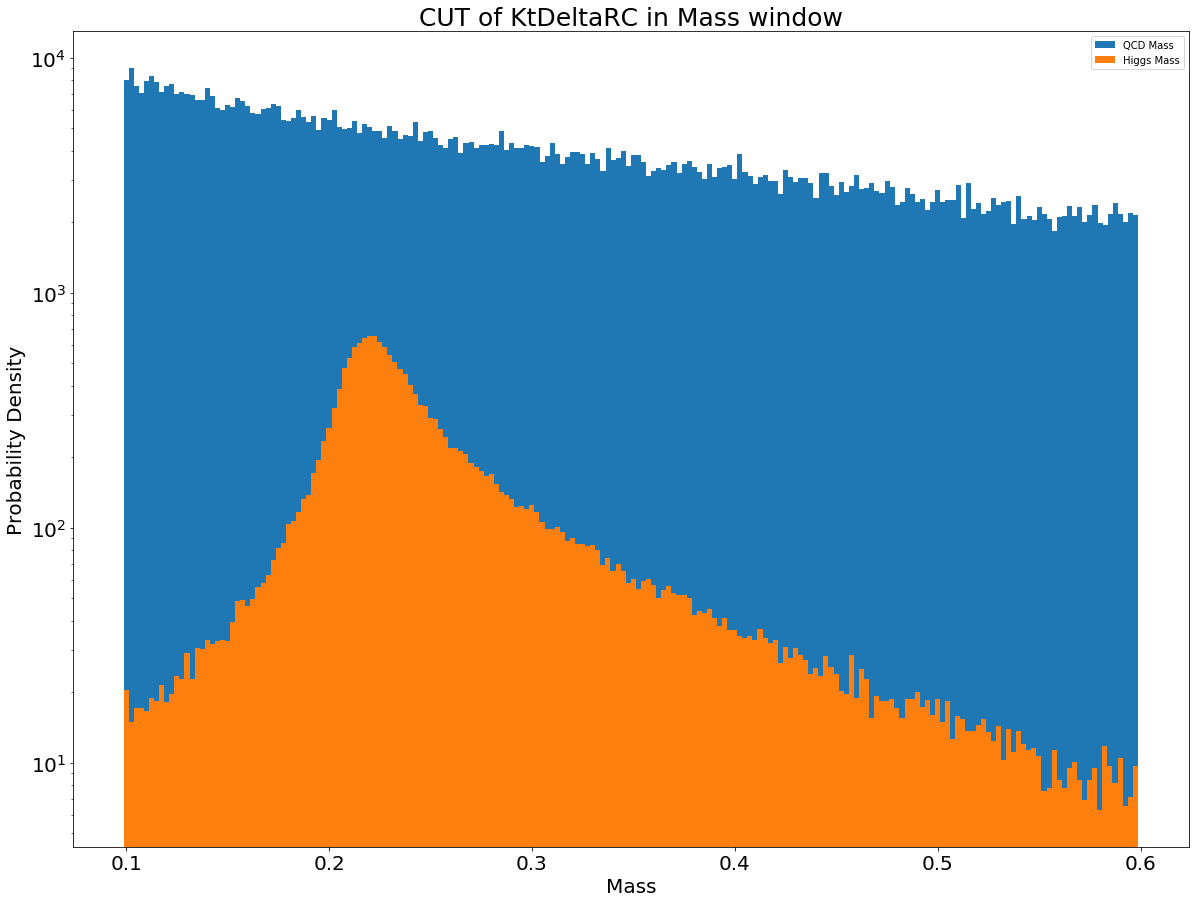

Expected yeild qcd =  2000.0000000000002
Expected yeild higgs =  50.0


In [213]:
#---- Plotting Transverse Momentum in mass window w/ CUT ----

#qcd data 
hist_qcd, bins_q = np.histogram(qCutB, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hCutB, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('CUT of KtDeltaRC in Mass window', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

In [214]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound

#(CHANGE for each different cut)
hMean = np.mean(hCutB)
hStd = np.std(hCutB)
qMean = np.mean(qCutB)

print('standard deviation of higgs data = ', hStd)
print('mean higgs data value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

standard deviation of higgs data =  0.07921646044524218
mean higgs data value =  0.26098975357898424

Higgs Signal 5 sigma detection:
Upper bound signal strength =  6.0
Lower bound signal strength =  0.0

QCD Signal 5 sigma detection:
signal strength =  6.0
Lower bound signal strength =  0.0

signal to noise ratio =  1.0


The signal to noise ratio increased from 0.857 to 0.875. This might be a good variable to use. 

Try mass cut within this window:

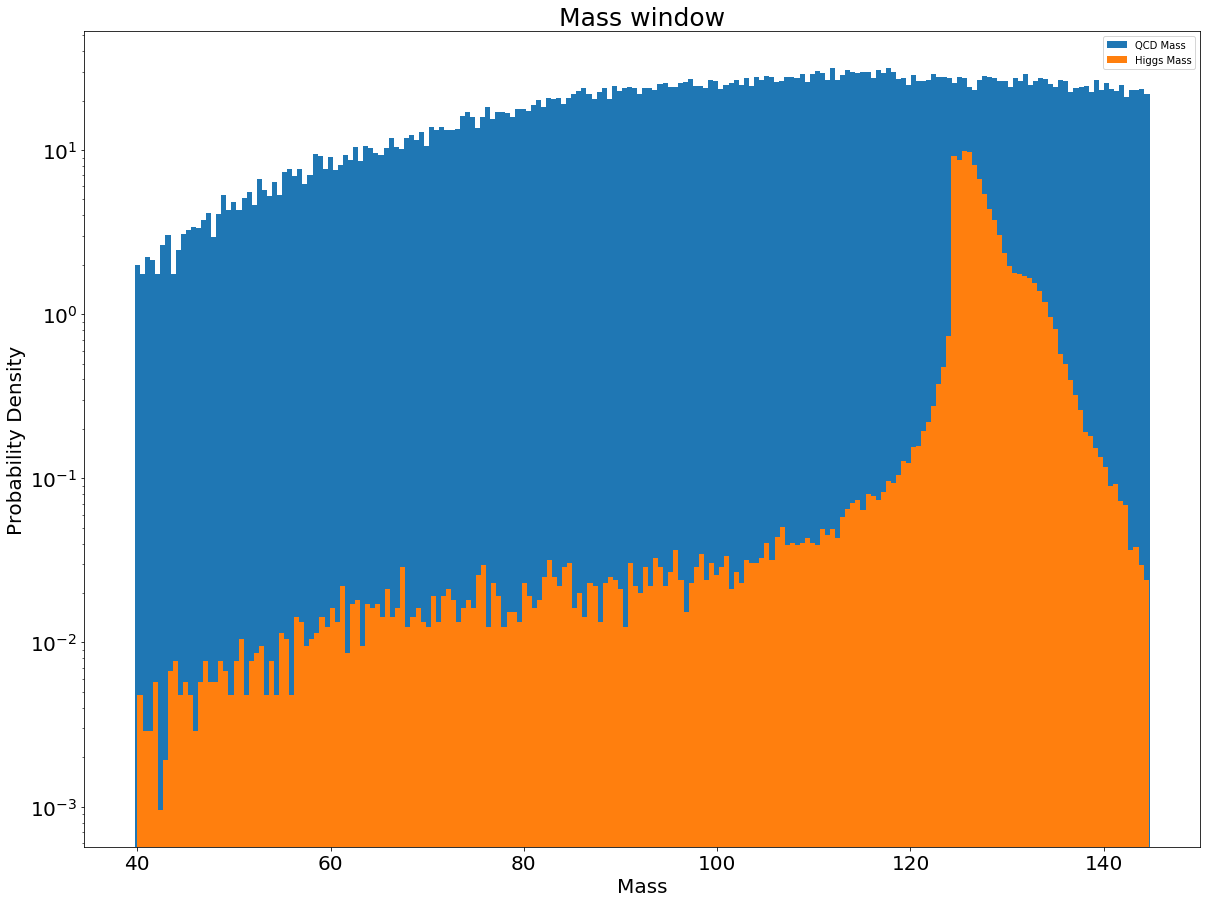

Expected yeild qcd =  2000.0000000000002
Expected yeild higgs =  50.0


In [215]:
#---- Plotting Transverse Momentum in mass window w/ CUT ----

#qcd data 
hist_qcd, bins_q = np.histogram(qMassC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Mass window', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

In [216]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound

#(CHANGE for each different cut)
hMean = np.mean(hMassC)
hStd = np.std(hMassC)
qMean = np.mean(qMassC)

print('standard deviation of higgs data = ', hStd)
print('mean higgs data value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

standard deviation of higgs data =  8.203060120226635
mean higgs data value =  126.68309057972657

Higgs Signal 5 sigma detection:
Upper bound signal strength =  187.0
Lower bound signal strength =  75.0

QCD Signal 5 sigma detection:
signal strength =  160.0
Lower bound signal strength =  58.0

signal to noise ratio =  1.16875


After trying the different variables we did not find any other variables with cuts improve the mass window significance.

After trying all the different variables to cut windows simultaniously with my mass no other variables were found to increase the significance. 

### Problem 4

The feature cuts that gave us the best significance is mass. We were not able to find any other variables that improved the significance. The mass variable was by far the best at discriminating between the higgs and the QCD data. 

My significance values are represented by the signal to noise ratio.

My values were:
- Before mass cut significance = 0.75
- After mass cut significance = 1.17

Over all there was an improvement of 0.42 significance after the mass cut was made, and much 

Lab partner's significance: 
Before mass cut significance = 1.13
After mass cut significance = 1.33

Compairing my values to my lab partners, I started out with a lower significance, and ended with a lower signifance. However my lab partner's overall improvement in signifance values was 0.20, which was about half of my data's imrpovement. 